# Machine Learning day 2

In [1]:
import sklearn
import seaborn as sns
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

## 1- Load the data from the file (`auto-mpg.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

In [2]:
col_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
df = pd.read_csv("auto-mpg.csv", header=None ,delim_whitespace=True)
df.columns = col_names

## 2- Data inspection. Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data. Use any necessary visualization techniques to inspect your data

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


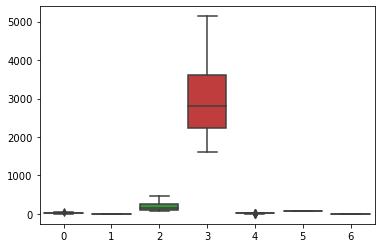

In [5]:
d1=df['mpg']
d2=df['cylinders']
d3=df['displacement']
d4=df['horsepower'] # error --> could not convert string to float: '?'
d5=df['weight']
d6=df['acceleration']
d7=df['model year']
d8=df['origin']
l=[d1,d2,d3,d5,d6,d7,d8]

sns.boxplot(data=l)
plt.show()

In [6]:
df['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393    86.00
394    52.00
395    84.00
396    79.00
397    82.00
Name: horsepower, Length: 398, dtype: object

In [7]:
df['horsepower'].replace('?',np.NAN,inplace = True)
df['horsepower'] = df['horsepower'].astype(float, errors = 'raise')
df['horsepower'].replace(np.NAN,df['horsepower'].median(),inplace=True)

In [8]:
df['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

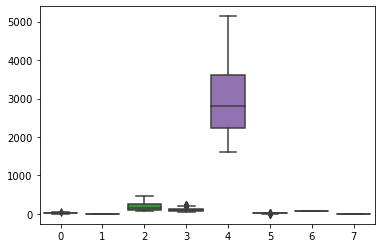

In [9]:
d1=df['mpg']
d2=df['cylinders']
d3=df['displacement']
d4=df['horsepower'] 
d5=df['weight']
d6=df['acceleration']
d7=df['model year']
d8=df['origin']
l=[d1,d2,d3,d4,d5,d6,d7,d8]

sns.boxplot(data=l)
plt.show()

In [10]:
df.drop_duplicates()
df.shape

(398, 9)

In [11]:
df.isnull().sum()
df.shape

(398, 9)

In [15]:
corr_matrix = df.corr().abs()
targed_correlation = corr_matrix[ corr_matrix > 0.6]
targed_correlation.fillna('-')

# Here we can see the cylinders and displacement and horsepower and weight are the most correlated features with mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1,0.775396,0.804203,0.773453,0.831741,-,-,-
cylinders,0.775396,1,0.950721,0.841284,0.896017,-,-,-
displacement,0.804203,0.950721,1,0.895778,0.932824,-,-,0.609409
horsepower,0.773453,0.841284,0.895778,1,0.862442,0.68659,-,-
weight,0.831741,0.896017,0.932824,0.862442,1,-,-,-
acceleration,-,-,-,0.68659,-,1,-,-
model year,-,-,-,-,-,-,1,-
origin,-,-,0.609409,-,-,-,-,1


<AxesSubplot:>

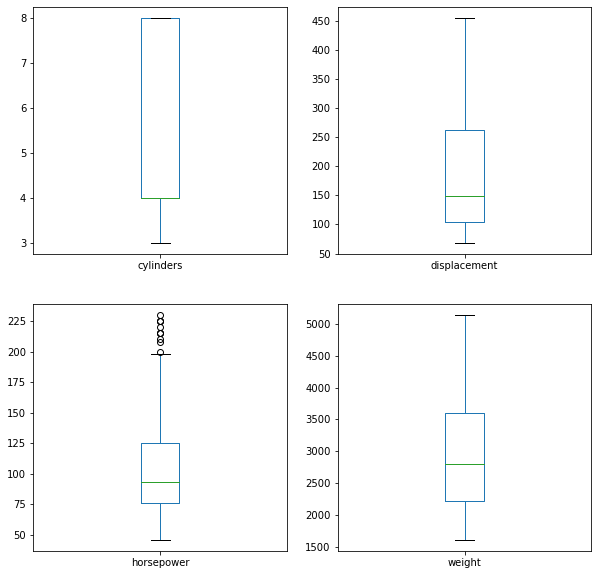

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df['cylinders'].plot(ax=axes[0,0],kind='box',figsize=(10,10))
df['displacement'].plot(ax=axes[0,1],kind='box',figsize=(10,10))
df['horsepower'].plot(ax=axes[1,0],kind='box',figsize=(10,10))
df['weight'].plot(ax=axes[1,1],kind='box',figsize=(10,10))

In [17]:
Q1=df['horsepower'].quantile(0.25)
Q3=df['horsepower'].quantile(0.75)
IQR=Q3-Q1
print("Old Shape: ", df.shape) 
not_outliers = df['horsepower'].between((Q1-1.5*IQR),(Q3+1.5*IQR))
df = df[not_outliers]
print("New Shape: ", df.shape) 

Old Shape:  (398, 9)
New Shape:  (387, 9)


## 3- Prepare the data for regression. Now you have to select the best 3 different independent variables to be used individually in your linear regression Model. Justify your reasoning

### 1-cylinders va mpg

In [21]:
X = np.array(df['cylinders']).reshape(len(df),1)
y = np.array(df['mpg'])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=0)

In [23]:
X_train.shape

(193, 1)

In [24]:
y_train.shape

(193,)

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [27]:
y_pred = regressor.predict(X_test) 
y_pred

array([28.82829752, 21.53979234, 28.82829752, 28.82829752, 14.25128716,
       14.25128716, 28.82829752, 14.25128716, 28.82829752, 21.53979234,
       21.53979234, 14.25128716, 21.53979234, 14.25128716, 21.53979234,
       14.25128716, 28.82829752, 28.82829752, 14.25128716, 28.82829752,
       28.82829752, 21.53979234, 28.82829752, 28.82829752, 28.82829752,
       28.82829752, 28.82829752, 28.82829752, 14.25128716, 21.53979234,
       28.82829752, 28.82829752, 28.82829752, 28.82829752, 14.25128716,
       14.25128716, 14.25128716, 28.82829752, 28.82829752, 14.25128716,
       28.82829752, 14.25128716, 14.25128716, 28.82829752, 21.53979234,
       28.82829752, 14.25128716, 21.53979234, 28.82829752, 28.82829752,
       28.82829752, 28.82829752, 28.82829752, 21.53979234, 14.25128716,
       28.82829752, 21.53979234, 14.25128716, 14.25128716, 28.82829752,
       28.82829752, 28.82829752, 28.82829752, 28.82829752, 21.53979234,
       28.82829752, 14.25128716, 28.82829752, 14.25128716, 28.82

In [28]:
y_test

array([21. , 18. , 27.9, 27. , 18.5, 15.5, 28. , 19.2, 22. , 19.2, 18. ,
       13. , 16. , 16.5, 20.5, 17. , 18. , 22. , 18.1, 23. , 27. , 24.2,
       46.6, 27. , 32.8, 23. , 25.5, 24. , 15. , 20.5, 35.7, 35. , 36. ,
       30. , 15. , 15. , 23. , 29.9, 21.5, 15. , 19. , 13. , 17.5, 24. ,
       19. , 30. , 13. , 19. , 34.1, 29. , 30. , 26. , 43.1, 20.6, 15. ,
       23. , 15. , 15. , 17.6, 30. , 26. , 26. , 36.1, 26.6, 21. , 32.4,
       19.4, 23.2, 14. , 28. , 29. , 15. , 13. , 18. , 38. , 29. , 19.4,
       20.8, 25.4, 14. , 14. , 23.8, 32. , 38. , 44. , 29.8, 30. , 19. ,
       36.1, 28.1, 25.8, 15. , 37. , 19.9, 34. , 18. , 23. ,  9. , 38.1,
       22. , 19. , 26. , 19. , 16. , 26. , 32.2, 31.9, 26. , 16. , 25.4,
       27. , 22. , 11. , 32.1, 13. , 20. , 14.5, 13. , 16. , 21. , 18. ,
       18. , 37.2, 28.4, 36. , 33.5, 24. , 40.8, 16. , 31. , 18. , 20. ,
       31. , 21. , 28. , 24.5, 25. , 19. , 44.6, 32. , 33. , 27. , 20. ,
       24. , 32.9, 13. , 30. , 23.9, 22.3, 31. , 14

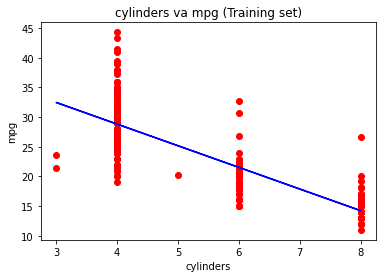

In [29]:
#plot for the TRAIN
plt.scatter(X_train, y_train, color='red')
 
plt.plot(X_train, regressor.predict(X_train), color='blue')
 
plt.title("cylinders va mpg (Training set)")
 
plt.xlabel("cylinders")
plt.ylabel("mpg")
plt.show()

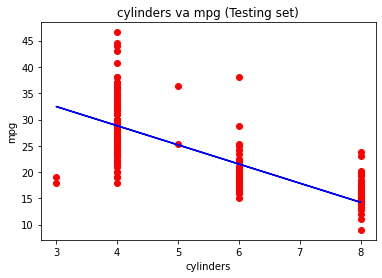

In [30]:
#plot for the TEST
 
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue')
 
plt.title("cylinders va mpg (Testing set)")
 
plt.xlabel("cylinders") 
plt.ylabel("mpg") 
plt.show() 

In [31]:
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

intercept: 43.40530786979652
slope: [-3.64425259]


In [32]:
r_sq = regressor.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5798356894244352


### 2- displacement va mpg

In [33]:
X = np.array(df['displacement']).reshape(len(df),1)
y = np.array(df['mpg'])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=0)

In [35]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [36]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [37]:
y_pred = regressor.predict(X_test) 
y_pred

array([27.99009573, 21.37583241, 25.80674667, 29.33863485, 12.70665232,
       15.40373057, 26.12782742, 18.67875416, 28.88912181, 20.99053551,
       19.77042869, 10.13800637, 19.77042869, 13.28459766, 21.37583241,
       16.30275665, 28.05431188, 28.05431188, 16.43118895, 29.59549945,
       26.83420505, 26.44890816, 30.30187709, 29.59549945, 30.81560628,
       26.83420505, 26.83420505, 28.18274418, 16.43118895, 20.99053551,
       29.5312833 , 27.99009573, 29.08177026, 27.1552858 , 10.78016786,
       13.34881381, 13.34881381, 29.5312833 , 28.05431188, 13.34881381,
       27.99009573, 13.34881381, 15.40373057, 28.56804107, 20.92631937,
       30.17344479, 16.11010821, 21.37583241, 30.30187709, 30.04501249,
       29.5312833 , 29.59549945, 30.04501249, 20.99053551,  8.27573806,
       28.11852803, 19.77042869, 11.2296809 , 16.43118895, 26.44890816,
       29.59549945, 29.59549945, 29.98079634, 26.12782742, 23.04545227,
       28.88912181, 15.40373057, 25.80674667, 16.30275665, 30.04

In [38]:
y_test

array([21. , 18. , 27.9, 27. , 18.5, 15.5, 28. , 19.2, 22. , 19.2, 18. ,
       13. , 16. , 16.5, 20.5, 17. , 18. , 22. , 18.1, 23. , 27. , 24.2,
       46.6, 27. , 32.8, 23. , 25.5, 24. , 15. , 20.5, 35.7, 35. , 36. ,
       30. , 15. , 15. , 23. , 29.9, 21.5, 15. , 19. , 13. , 17.5, 24. ,
       19. , 30. , 13. , 19. , 34.1, 29. , 30. , 26. , 43.1, 20.6, 15. ,
       23. , 15. , 15. , 17.6, 30. , 26. , 26. , 36.1, 26.6, 21. , 32.4,
       19.4, 23.2, 14. , 28. , 29. , 15. , 13. , 18. , 38. , 29. , 19.4,
       20.8, 25.4, 14. , 14. , 23.8, 32. , 38. , 44. , 29.8, 30. , 19. ,
       36.1, 28.1, 25.8, 15. , 37. , 19.9, 34. , 18. , 23. ,  9. , 38.1,
       22. , 19. , 26. , 19. , 16. , 26. , 32.2, 31.9, 26. , 16. , 25.4,
       27. , 22. , 11. , 32.1, 13. , 20. , 14.5, 13. , 16. , 21. , 18. ,
       18. , 37.2, 28.4, 36. , 33.5, 24. , 40.8, 16. , 31. , 18. , 20. ,
       31. , 21. , 28. , 24.5, 25. , 19. , 44.6, 32. , 33. , 27. , 20. ,
       24. , 32.9, 13. , 30. , 23.9, 22.3, 31. , 14

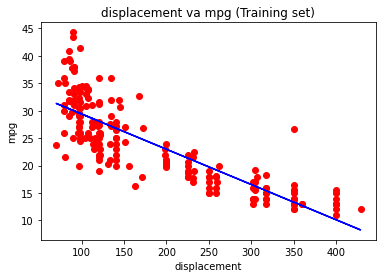

In [39]:
#plot for the TRAIN
plt.scatter(X_train, y_train, color='red')
 
plt.plot(X_train, regressor.predict(X_train), color='blue')
 
plt.title("displacement va mpg (Training set)")
 
plt.xlabel("displacement")
plt.ylabel("mpg")
plt.show()

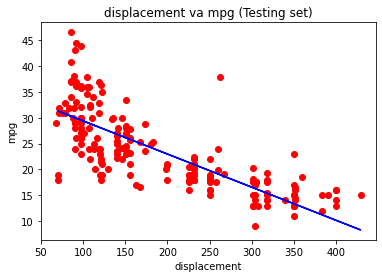

In [40]:
#plot for the TEST
 
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') 
 
plt.title("displacement va mpg (Testing set)")
 
plt.xlabel("displacement") 
plt.ylabel("mpg") 
plt.show() 

In [41]:
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

intercept: 35.8244658799606
slope: [-0.06421615]


In [42]:
r_sq = regressor.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6384629493430867


### 3- horsepower va mpg

In [43]:
X = np.array(df['horsepower']).reshape(len(df),1)
y = np.array(df['mpg'])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=0)

In [45]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [46]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [47]:
y_pred = regressor.predict(X_test) 
y_pred

array([26.65122754, 23.20591889, 23.20591889, 27.19522365, 15.04597734,
       15.95263751, 25.9258994 , 19.5792782 , 25.20057127, 23.20591889,
       23.20591889, 10.51267647, 24.11257906, 17.22196175, 24.11257906,
       15.04597734, 21.93659465, 24.47524313, 17.04062971, 32.45385265,
       26.65122754, 20.48593837, 30.45920027, 26.28856347, 32.81651671,
       28.10188382, 26.10723144, 24.65657516, 18.67261802, 23.20591889,
       27.73921975, 26.28856347, 28.82721196, 27.01389161,  7.79269596,
       12.32599682, 19.5792782 , 30.45920027, 22.29925871, 15.95263751,
       26.83255958, 14.13931716, 16.85929768, 25.01923923, 24.11257906,
       28.46454789, 18.67261802, 25.01923923, 30.45920027, 29.55254009,
       29.91520416, 33.90450892, 33.54184485, 23.20591889,  6.34203968,
       24.65657516, 29.18987602, 11.41933665, 18.85395006, 30.0965362 ,
       28.10188382, 28.64587992, 31.36586044, 27.01389161, 25.9258994 ,
       28.64587992, 16.85929768, 23.20591889, 15.04597734, 28.64

In [48]:
y_test

array([21. , 18. , 27.9, 27. , 18.5, 15.5, 28. , 19.2, 22. , 19.2, 18. ,
       13. , 16. , 16.5, 20.5, 17. , 18. , 22. , 18.1, 23. , 27. , 24.2,
       46.6, 27. , 32.8, 23. , 25.5, 24. , 15. , 20.5, 35.7, 35. , 36. ,
       30. , 15. , 15. , 23. , 29.9, 21.5, 15. , 19. , 13. , 17.5, 24. ,
       19. , 30. , 13. , 19. , 34.1, 29. , 30. , 26. , 43.1, 20.6, 15. ,
       23. , 15. , 15. , 17.6, 30. , 26. , 26. , 36.1, 26.6, 21. , 32.4,
       19.4, 23.2, 14. , 28. , 29. , 15. , 13. , 18. , 38. , 29. , 19.4,
       20.8, 25.4, 14. , 14. , 23.8, 32. , 38. , 44. , 29.8, 30. , 19. ,
       36.1, 28.1, 25.8, 15. , 37. , 19.9, 34. , 18. , 23. ,  9. , 38.1,
       22. , 19. , 26. , 19. , 16. , 26. , 32.2, 31.9, 26. , 16. , 25.4,
       27. , 22. , 11. , 32.1, 13. , 20. , 14.5, 13. , 16. , 21. , 18. ,
       18. , 37.2, 28.4, 36. , 33.5, 24. , 40.8, 16. , 31. , 18. , 20. ,
       31. , 21. , 28. , 24.5, 25. , 19. , 44.6, 32. , 33. , 27. , 20. ,
       24. , 32.9, 13. , 30. , 23.9, 22.3, 31. , 14

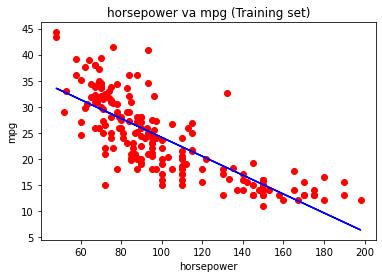

In [52]:
#plot for the TRAIN
plt.scatter(X_train, y_train, color='red')
 
plt.plot(X_train, regressor.predict(X_train), color='blue')
 
plt.title("horsepower va mpg (Training set)")
 
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.show()

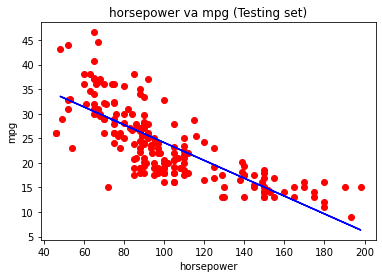

In [51]:
#plot for the TEST
 
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') 
plt.title("horsepower va mpg (Testing set)")
 
plt.xlabel("horsepower") 
plt.ylabel("mpg") 
plt.show() 

In [53]:
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

intercept: 42.24578250703785
slope: [-0.18133203]


In [54]:
r_sq = regressor.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6106315517541184


### 4-weight va mpg 

In [56]:
X = np.array(df['weight']).reshape(len(df),1)
y = np.array(df['mpg'])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=0)

In [58]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [59]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [60]:
y_pred = regressor.predict(X_test) 
y_pred

array([29.32248966, 18.47645937, 24.83393783, 29.5101643 , 15.91939238,
       14.35543704, 25.78795059, 18.53901758, 28.12606383, 19.08640195,
       19.68070498,  6.53566034, 17.16273688, 15.80209573, 19.90747851,
       18.01509254, 23.79390753, 23.70007021, 21.66692826, 29.10353591,
       24.9121356 , 23.81736686, 30.22958376, 30.30778153, 31.20705585,
       26.46045139, 25.18582778, 26.82798089, 13.14337165, 19.94657739,
       31.75444022, 27.17987084, 31.24615473, 28.07914516, 16.62317229,
       17.85087723, 16.23218345, 28.11824405, 26.39789317, 12.00950403,
       28.66562842, 11.52467788, 14.82462365, 28.18080226, 26.13202076,
       30.58147371, 14.68386766, 21.20556144, 31.28525361, 31.58240513,
       29.87769381, 32.38002235, 31.20705585, 20.29846734, 12.78366193,
       27.13295218, 22.03445777, 18.8674482 , 17.60064438, 21.31503831,
       28.74382619, 29.01751837, 32.65371454, 26.12420099, 26.02254389,
       28.35283735, 17.52244661, 25.26402555, 18.01509254, 30.11

In [61]:
y_test

array([21. , 18. , 27.9, 27. , 18.5, 15.5, 28. , 19.2, 22. , 19.2, 18. ,
       13. , 16. , 16.5, 20.5, 17. , 18. , 22. , 18.1, 23. , 27. , 24.2,
       46.6, 27. , 32.8, 23. , 25.5, 24. , 15. , 20.5, 35.7, 35. , 36. ,
       30. , 15. , 15. , 23. , 29.9, 21.5, 15. , 19. , 13. , 17.5, 24. ,
       19. , 30. , 13. , 19. , 34.1, 29. , 30. , 26. , 43.1, 20.6, 15. ,
       23. , 15. , 15. , 17.6, 30. , 26. , 26. , 36.1, 26.6, 21. , 32.4,
       19.4, 23.2, 14. , 28. , 29. , 15. , 13. , 18. , 38. , 29. , 19.4,
       20.8, 25.4, 14. , 14. , 23.8, 32. , 38. , 44. , 29.8, 30. , 19. ,
       36.1, 28.1, 25.8, 15. , 37. , 19.9, 34. , 18. , 23. ,  9. , 38.1,
       22. , 19. , 26. , 19. , 16. , 26. , 32.2, 31.9, 26. , 16. , 25.4,
       27. , 22. , 11. , 32.1, 13. , 20. , 14.5, 13. , 16. , 21. , 18. ,
       18. , 37.2, 28.4, 36. , 33.5, 24. , 40.8, 16. , 31. , 18. , 20. ,
       31. , 21. , 28. , 24.5, 25. , 19. , 44.6, 32. , 33. , 27. , 20. ,
       24. , 32.9, 13. , 30. , 23.9, 22.3, 31. , 14

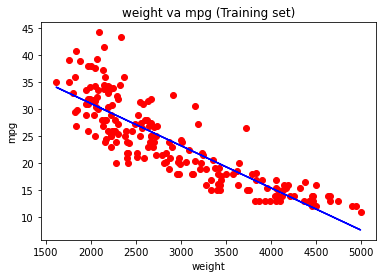

In [63]:
#plot for the TRAIN
plt.scatter(X_train, y_train, color='red')
 
plt.plot(X_train, regressor.predict(X_train), color='blue')
 
plt.title("weight va mpg (Training set)")
 
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()

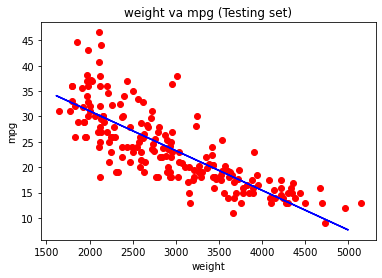

In [65]:
#plot for the TEST
 
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') 
plt.title("weight va mpg (Testing set)")
 
plt.xlabel("weight") 
plt.ylabel("mpg") 
plt.show() 

In [66]:
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

intercept: 46.72931261222293
slope: [-0.00781978]


In [67]:
r_sq = regressor.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.67837442507766


## so we can choose horsepower , displacement and weight to be the best 3 features for expressing the mpg

## Implementation of linear regression

In [69]:
# Normalize the features
x = df[['displacement','horsepower','weight']]
y = df.mpg
x_norm = (x - x.mean()) / x.std()
y_norm = (y - y.mean()) / y.std()

In [70]:
x_norm=np.array(x_norm)
x_norm=np.c_[np.ones(len(x_norm)),x_norm]
y_norm=np.array(y_norm).reshape(len(y_norm),1)
thetas=np.zeros(x_norm.shape[1]).reshape(x_norm.shape[1],1)

In [71]:
def lossFunction(y_predict,y):
    m=len(y)
    return (1/(2*m))*sum((y_predict-y)**2)

def batchGD(x,y,b,alpha,max_iters):
    m=len(y)
    cost_list=[]
    gradients=[0]*len(b)
    for _ in range(max_iters):
        y_predict=np.dot(x,b)
        cost=lossFunction(y_predict,y)
        cost_list.append(cost)
        for i in range(len(b)):
            gradients[i]=(1/m)*sum((y_predict-y)*x[:,i].reshape(len(x),1))
            b[i]=b[i]-alpha*gradients[i]
    return b,cost_list

In [72]:
class LinearRegression:
    
    def __init__(self):
        self.theta=[]
        self.cost=[]
        
    def train(self,x,y,b,alpha,max_iters):
        self.theta,self.cost=batchGD(x,y,b,alpha,max_iters)
    
    def test(self,x):
        return x.dot(self.theta)

In [73]:
model = LinearRegression()
model.train(x_norm, y_norm, thetas, 0.1, 1000)
model.theta

array([[-1.78897953e-16],
       [-8.87841820e-02],
       [-2.34750732e-01],
       [-5.35309601e-01]])

In [74]:
y_predicted=model.test(x_norm)
y_predicted_normal=(y_predicted*y.std())+y.mean()
print(y_predicted_normal)

[[18.55884522]
 [15.42838013]
 [17.74770398]
 [17.85981417]
 [18.33149272]
 [ 9.851554  ]
 [13.01751244]
 [15.58322384]
 [16.18849913]
 [15.54759542]
 [27.47043463]
 [24.56673398]
 [24.74838622]
 [26.32607074]
 [29.17302279]
 [32.91428989]
 [26.41557788]
 [27.48990615]
 [27.51776128]
 [27.13915729]
 [25.757677  ]
 [ 9.02409187]
 [29.17302279]
 [28.09456167]
 [28.19339507]
 [29.2918388 ]
 [25.0610642 ]
 [20.79896706]
 [21.4469993 ]
 [22.22832647]
 [21.77761886]
 [12.83777189]
 [10.67278419]
 [13.75274266]
 [14.4341353 ]
 [ 8.05646283]
 [ 9.52605837]
 [ 7.27888657]
 [22.69594461]
 [28.34025937]
 [21.68296555]
 [23.04667753]
 [28.65550027]
 [28.96882932]
 [30.54760886]
 [30.20751952]
 [32.38332501]
 [32.96442498]
 [32.16590968]
 [31.0618709 ]
 [27.94236714]
 [29.62015373]
 [30.38016111]
 [27.37160123]
 [28.62537692]
 [12.51143558]
 [11.06940833]
 [14.23833351]
 [13.87825663]
 [16.65990067]
 [11.90489162]
 [11.86676561]
 [10.07643254]
 [27.87174699]
 [15.55537777]
 [15.5766334 ]
 [14.08912

In [75]:
y=np.array(y).reshape(len(y),1)
ss_tot=sum((y-y.mean())**2)
ss_res=sum((y-y_predicted_normal)**2)
r2=1-(ss_res/ss_tot)
print('R_Squared = ', r2)

R_Squared =  [0.69539254]
